# Air Quality in Istanbul between 2014.01 - 2020.07

 -*- coding: utf-8 -*-


Created on Thursday Aug  2 21:34:41 2020

@author: erolerdogan


**T	:**Average Temperature (°C)

**TM:**Maximum temperature (°C)

**Tm:**Minimum temperature (°C)

**SLP:**	Atmospheric pressure at sea level (hPa)

**H	:** Average relative humidity (%)

**PP:**Total rainfall and / or snowmelt (mm)

**VV:**Average visibility (Km)

**V	:**Average wind speed (Km/h)

**VM:**Maximum sustained wind speed (Km/h)

**VG:**Maximum speed of wind (Km/h)

**RA:**Indicate if there was rain or drizzle (In the monthly average, total days it rained)

**SN:**Snow indicator (In the monthly average, total days that snowed)

**TS:**Indicates whether there storm (In the monthly average, Total days with thunderstorm)

**FG:**Indicates whether there was fog (In the monthly average, Total days with fog)

### Data Sources

1. AQI (PM2.5, PM10 etc) => https://aqicn.org/data-platform/register/
2. The data between 2017-2020 from Turkey => https://sim.csb.gov.tr/
3. Details (T, TM, Tm etc.) => https://en.tutiempo.net/istanbul.html
4. http://www.havaizleme.gov.tr/


### Useful Links to understand project items better

1. PM2.5 vs PM10 => https://smartairfilters.com/en/blog/pm10-pm2-5-difference-particle-air-pollution/
2. Conversion from PM10 to PM2.5 => https://www.epd.gov.hk/epd/english/environmentinhk/air/guide_ref/guide_aqa_model_g5.html
3. Equation of calculating Air Quality Index => https://en.wikipedia.org/wiki/Air_quality_index

## Data Importing and Understanding

In [103]:
import pandas as pd
import numpy as np

#### Air Quality Dataset from 1st source 

In [199]:
aqi_first = pd.read_excel("istanbul_sirinevler_aqi_2014-2020.xlsx",
                          names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"], header=2)
aqi_first.head(11)

,Date,pm10,so2,co,no2,o3,pm2.5
0,2014-01-01 00:00:56,-,"3,52","1.221,74","53,64",-,-
1,2014-01-02 00:00:56,"82,49","6,40","1.473,91","65,40",-,-
2,2014-01-03 00:00:56,-,"6,71","1.613,04","70,63",-,-
3,2014-01-04 00:00:56,"72,03","9,35","1.349,42","64,09",-,-
4,2014-01-05 00:00:56,"72,03","11,59","1.399,42","68,08",-,-
5,2014-01-06 00:00:56,"72,03","11,43","1.311,92","79,23",-,-
6,2014-01-07 00:00:56,"72,03","11,00","1.070,25","70,54",-,-
7,2014-01-08 00:00:56,"76,83","4,89","1.028,58","52,90",-,-
8,2014-01-09 00:00:56,"94,06","6,91","1.324,42","68,92",-,-
9,2014-01-10 00:00:56,"106,08","7,07","1.282,75","73,48",-,-


#### Air Quality 2017-2020 dataset from Turkey ministry 2nd source

In [105]:
## On new version, we donot need to use or merge new data 

#aqi_second = pd.read_excel("istanbul_besiktas_aqi_sim_2017-2020.xlsx", header=1,
#                           names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"])
#
#aqi_second.head()
#

#### 2017-11 dataset (due to absence of this month)

In [106]:
## On new version, we donot need to use or merge new data 

#data_201711 = pd.read_excel("istanbul_mecidiyekoy_aqi_2017-11.xlsx", header=3,
#                            names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"])
#data_201711.head()

#### Detailed Dataset (T, TM, Tm, PP etc.) from 3rd source

In [500]:
detailed_data = pd.read_csv("combined_data.csv")

detailed_data.head()

,Unnamed: 0,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,Date
0,0,1,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,NaN,2014-1
1,1,2,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,NaN,2014-1
2,2,3,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,NaN,2014-1
3,3,4,8.8,11.0,6.0,NaN,86.0,0.00,8.7,9.4,18.3,22.2,2014-1
4,4,5,8.1,10.0,5.8,NaN,90.0,0.00,5.0,1.7,11.1,NaN,2014-1


## Data Cleansing and Manipulation

#### Working on Detailed Data

In [501]:
for i in range(len(detailed_data)):
    detailed_data.loc[i, "Date"] = str(detailed_data.Date[i]) + "-" + str(detailed_data.Day[i])

detailed_data = detailed_data.iloc[:,2:]
detailed_data.Date = pd.to_datetime(detailed_data.Date).dt.strftime("%Y-%m-%d")
detailed_data.head()

,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,Date
0,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,NaN,2014-01-01
1,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,NaN,2014-01-02
2,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,NaN,2014-01-03
3,8.8,11.0,6.0,NaN,86.0,0.00,8.7,9.4,18.3,22.2,2014-01-04
4,8.1,10.0,5.8,NaN,90.0,0.00,5.0,1.7,11.1,NaN,2014-01-05


In [502]:
detailed_data.shape

(2465, 11)

In [503]:
detailed_data.isna().sum()

T         16
TM        16
Tm        16
SLP     2461
H         19
PP        91
VV       284
V         16
VM        16
VG       747
Date       0
dtype: int64

In [504]:
detailed_data.notna().sum()

T       2449
TM      2449
Tm      2449
SLP        4
H       2446
PP      2374
VV      2181
V       2449
VM      2449
VG      1718
Date    2465
dtype: int64

#### Working on Air Quality Data from 1st Source

In [505]:
# Changing empty or wrong cell's values as NaN values
aqi_first.replace(["", " ", "-"], np.nan, inplace=True)
aqi_first.replace([","], np.nan, inplace=True)
# Converting Date to actual datetime
aqi_first.Date = pd.to_datetime(aqi_first.Date)

aqi_first.sort_values(by="Date", inplace=True)
aqi_first.reset_index(drop=True, inplace=True)

###      # Removing 2020 datas because of we don't have it within 'combined_data.csv'
###      aqi_first = aqi_first.iloc[:-3,:]

# No need to mask anymore. Modification data: 2020-10-09 by erolerdogan
###      # Due to combine data
###      mask = aqi_first.Date < "2017-01-02"
###      aqi_first = aqi_first[mask]

# Converting Date to actual datetime
aqi_first.Date = pd.to_datetime(aqi_first.Date).dt.strftime("%Y-%m-%d")
aqi_first.head()

,Date,pm10,so2,co,no2,o3,pm2.5
0,2014-01-01,NaN,"3,52","1.221,74","53,64",NaN,NaN
1,2014-01-02,"82,49","6,40","1.473,91","65,40",NaN,NaN
2,2014-01-03,NaN,"6,71","1.613,04","70,63",NaN,NaN
3,2014-01-04,"72,03","9,35","1.349,42","64,09",NaN,NaN
4,2014-01-05,"72,03","11,59","1.399,42","68,08",NaN,NaN


In [506]:
aqi_first.shape

(2465, 7)

In [507]:
aqi_first.isnull().sum()

Date        0
pm10       84
so2        59
co         49
no2        45
o3       2465
pm2.5    2465
dtype: int64

In [508]:
# aqi.drop("pm2.5", axis=1, inplace=True) # Dropping to PM2.5 index due to many NA values

aqi_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2465 non-null   object 
 1   pm10    2381 non-null   object 
 2   so2     2406 non-null   object 
 3   co      2416 non-null   object 
 4   no2     2420 non-null   object 
 5   o3      0 non-null      float64
 6   pm2.5   0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 134.9+ KB


In [509]:
aqi_first.tail()

,Date,pm10,so2,co,no2,o3,pm2.5
2460,2020-09-26,"55,14","8,36","1.404,99","86,71",NaN,NaN
2461,2020-09-27,"40,48","7,06",NaN,"42,92",NaN,NaN
2462,2020-09-28,"58,45","5,85",NaN,"87,67",NaN,NaN
2463,2020-09-29,"53,98","2,87","1.440,46","71,68",NaN,NaN
2464,2020-09-30,"39,08","3,45","1.243,07","68,61",NaN,NaN


#### Working on Air Quality Dataset from 2nd source  
##### (no need to work on it anymore 10/11/2020 by erolerdogan)

In [8]:
# mask = ((aqi_second.Date > "2017-11") & (aqi_second.Date < "2017-12"))
# #combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(so2_mean)
# 
# aqi_second.drop(list(aqi_second[mask].index), inplace=True)
# 
# aqi_second.Date = pd.to_datetime(aqi_second.Date).dt.strftime("%Y-%m-%d")
# data_201711.Date = pd.to_datetime(data_201711.Date).dt.strftime("%Y-%m-%d")
# 
# # Concantenating aqi data from second source and data of 2017-11 
# aqi_second = pd.concat([aqi_second, data_201711])
# 
# 
# #### Combining whole Air Quality Indexes Datasets
# 
# # Combined Istanbul Ministry data and website data (first source and second source datasets)
# aqi = pd.concat([aqi_first, aqi_second])
# 
# # Converting the numeric values to float64 from object
# aqi[["pm2.5", "pm10", "o3", "no2", "so2", "co"]] = aqi[["pm2.5", "pm10", "o3",
#                                                                     "no2", "so2", "co"]].astype(dtype="float64", 
#                                                                                                   errors="ignore")
# aqi.Date = pd.to_datetime(aqi.Date).dt.strftime("%Y-%m-%d")
# 
# aqi.head()

#### Combining Air Quality Index Dataset with Climate Information Dataset

In [510]:
print(aqi_first.shape)
aqi_first.head()

(2465, 7)


,Date,pm10,so2,co,no2,o3,pm2.5
0,2014-01-01,NaN,"3,52","1.221,74","53,64",NaN,NaN
1,2014-01-02,"82,49","6,40","1.473,91","65,40",NaN,NaN
2,2014-01-03,NaN,"6,71","1.613,04","70,63",NaN,NaN
3,2014-01-04,"72,03","9,35","1.349,42","64,09",NaN,NaN
4,2014-01-05,"72,03","11,59","1.399,42","68,08",NaN,NaN


In [511]:
print(detailed_data.shape)
detailed_data.head()

(2465, 11)


,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,Date
0,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,NaN,2014-01-01
1,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,NaN,2014-01-02
2,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,NaN,2014-01-03
3,8.8,11.0,6.0,NaN,86.0,0.00,8.7,9.4,18.3,22.2,2014-01-04
4,8.1,10.0,5.8,NaN,90.0,0.00,5.0,1.7,11.1,NaN,2014-01-05


#### Merging all data. Air Quality Dataset - Climate Information Dataset

In [512]:
combined_df = pd.merge(aqi_first, detailed_data, on="Date", how="right")


# combined_df.set_index([combined_df.Date], inplace=True)
combined_df.sort_values(by="Date", inplace=True)
combined_df.Date = pd.to_datetime(combined_df.Date).dt.strftime('%Y-%m')

# Dropping the column if the number of NaN values are more than the half of whole values 
combined_df.dropna(axis=1, how="any", thresh=len(combined_df)/2, inplace=True)

# Dropping the column if there is no value
for i in combined_df.columns:
    if len(combined_df[i].unique()) == 1:
        combined_df.drop([i], axis=1, inplace=True)

# creating Month column to use later
for i in range(len(combined_df)):
    combined_df.loc[i, "Month"] = combined_df.Date[i].split("-")[1]

    combined_df.loc[i, "Year"] = combined_df.Date[i].split("-")[0]
    
# Converting "," comma to "." dot.
for column in combined_df.columns[1:]:
    for index in range(len(combined_df)):            
        
        if isinstance(combined_df[column][index], str) == True:
            if "." in list(combined_df.loc[index, column]):
                combined_df.loc[index, column] = combined_df[column][index].replace(".", "")
            
            combined_df.loc[index, column] = combined_df[column][index].replace(",", ".")
    
    combined_df[column] = pd.to_numeric(combined_df[column])
        
# Converting to data type to float
for column in combined_df.columns[1:]:
    combined_df[column].astype(dtype="float64")

In [514]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 0 to 2464
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2465 non-null   object 
 1   pm10    2381 non-null   float64
 2   so2     2406 non-null   float64
 3   co      2416 non-null   float64
 4   no2     2420 non-null   float64
 5   T       2449 non-null   float64
 6   TM      2449 non-null   float64
 7   Tm      2449 non-null   float64
 8   H       2446 non-null   float64
 9   PP      2374 non-null   float64
 10  VV      2181 non-null   float64
 11  V       2449 non-null   float64
 12  VM      2449 non-null   float64
 13  VG      1718 non-null   float64
 14  Month   2465 non-null   int64  
 15  Year    2465 non-null   int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 407.4+ KB


In [515]:
combined_df.head()

,Date,pm10,so2,co,no2,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
0,2014-01,NaN,3.52,1221.74,53.64,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,NaN,1,2014
1,2014-01,82.49,6.40,1473.91,65.40,8.8,11.0,7.0,73.0,0.00,9.8,8.7,16.5,NaN,1,2014
2,2014-01,NaN,6.71,1613.04,70.63,9.0,11.0,7.5,83.0,0.51,8.4,10.2,14.8,NaN,1,2014
3,2014-01,72.03,9.35,1349.42,64.09,8.8,11.0,6.0,86.0,0.00,8.7,9.4,18.3,22.2,1,2014
4,2014-01,72.03,11.59,1399.42,68.08,8.1,10.0,5.8,90.0,0.00,5.0,1.7,11.1,NaN,1,2014


In [516]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 0 to 2464
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2465 non-null   object 
 1   pm10    2381 non-null   float64
 2   so2     2406 non-null   float64
 3   co      2416 non-null   float64
 4   no2     2420 non-null   float64
 5   T       2449 non-null   float64
 6   TM      2449 non-null   float64
 7   Tm      2449 non-null   float64
 8   H       2446 non-null   float64
 9   PP      2374 non-null   float64
 10  VV      2181 non-null   float64
 11  V       2449 non-null   float64
 12  VM      2449 non-null   float64
 13  VG      1718 non-null   float64
 14  Month   2465 non-null   int64  
 15  Year    2465 non-null   int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 407.4+ KB


In [517]:
combined_df.isna().sum()

Date       0
pm10      84
so2       59
co        49
no2       45
T         16
TM        16
Tm        16
H         19
PP        91
VV       284
V         16
VM        16
VG       747
Month      0
Year       0
dtype: int64

In [518]:
combined_df.describe()

,pm10,so2,co,no2,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
count,2381.000000,2406.000000,2416.000000,2420.000000,2449.000000,2449.000000,2449.000000,2446.000000,2374.000000,2181.000000,2449.000000,2449.000000,1718.000000,2465.000000,2465.000000
mean,49.818152,6.169697,889.421722,63.321897,16.571376,20.096325,12.984034,68.147179,1.557978,9.382164,16.019437,26.949367,42.802852,6.355375,2016.888844
std,28.519878,4.948178,759.247316,25.918667,7.381346,8.092176,7.188279,10.402159,4.393212,1.300080,6.155751,8.546629,11.822021,3.397304,1.950227
min,6.760000,0.560000,105.710000,11.780000,-4.400000,-2.900000,-6.700000,31.000000,0.000000,1.400000,0.700000,5.400000,18.300000,1.000000,2014.000000
25%,31.370000,2.570000,508.552500,44.145000,10.300000,13.200000,7.000000,61.000000,0.000000,9.300000,11.500000,20.600000,35.200000,3.000000,2015.000000
50%,44.120000,4.975000,722.325000,60.390000,16.500000,20.000000,12.800000,68.000000,0.000000,10.000000,15.200000,25.900000,42.400000,6.000000,2017.000000
75%,62.170000,8.010000,1081.165000,79.742500,23.600000,27.800000,19.700000,76.000000,0.510000,10.000000,19.800000,31.700000,50.000000,9.000000,2019.000000
max,292.520000,34.460000,7383.950000,184.840000,31.500000,38.200000,26.000000,97.000000,67.310000,12.600000,47.600000,61.100000,98.200000,12.000000,2020.000000


In [519]:
month_grouped_combined_df = combined_df.groupby(["Date"], sort=False)
year_grouped_combined_df = combined_df.groupby(["Year"])

In [520]:
year_grouped_combined_df.first()

,Date,pm10,so2,co,no2,T,TM,Tm,H,PP,VV,V,VM,VG,Month
Year,,,,,,,,,,,,,,,
2014,2014-01,82.49,3.52,1221.74,53.64,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,22.2,1
2015,2015-01,29.83,4.36,695.65,40.67,3.2,4.0,2.5,78.0,13.72,7.6,36.1,42.4,61.1,1
2016,2016-01,31.24,10.07,946.54,59.88,-1.7,1.0,-5.0,66.0,19.30,8.5,15.2,33.5,57.6,1
2017,2017-01,33.66,2.72,1227.88,84.54,3.1,5.0,0.7,77.0,6.10,9.5,12.6,18.3,46.5,1
2018,2018-01,40.96,4.39,584.56,56.81,9.2,11.0,7.0,76.0,0.25,10.0,16.5,25.9,40.7,1
2019,2019-01,37.35,8.70,657.53,66.69,7.0,10.2,4.3,64.0,0.00,10.0,19.4,31.7,46.5,1
2020,2020-01,55.78,5.55,1228.69,65.02,6.1,9.0,2.2,69.0,1.02,9.8,19.4,35.2,57.6,1


In [521]:
month_grouped_combined_df.first()

,pm10,so2,co,no2,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
Date,,,,,,,,,,,,,,,
2014-01,82.49,3.52,1221.74,53.64,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,22.2,1,2014
2014-02,53.53,8.82,707.75,53.58,5.7,7.2,3.0,71.0,0.00,10.0,22.6,31.7,51.9,2,2014
2014-03,120.20,21.37,1545.25,99.77,10.6,14.0,8.2,72.0,0.25,9.8,2.6,14.8,27.8,3,2014
2014-04,85.86,22.32,1136.92,107.14,11.4,15.0,5.0,73.0,0.00,8.9,6.5,20.6,31.7,4,2014
2014-05,56.01,11.60,457.75,62.15,15.0,18.0,12.5,79.0,3.30,10.0,4.1,18.3,22.2,5,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05,30.11,10.09,1180.81,33.13,16.7,21.0,14.0,78.0,0.00,10.0,9.6,16.5,25.9,5,2020
2020-06,27.13,5.97,1441.16,50.72,17.3,20.0,15.0,71.0,5.08,9.8,10.0,18.3,29.4,6,2020
2020-07,62.32,6.54,1380.85,62.43,27.3,32.0,21.4,61.0,0.00,10.0,18.5,25.9,37.0,7,2020


#### **Important:**  Decision of the NaN values filling. Based on the mean of months of that year or based on the mean of previous years of that month. Decided to use that month. 

In [522]:
# Filling NA values with mean of that month's values
for date in set(list(combined_df.Date)):   
    for column in combined_df.columns[1:-2]:
        mask = combined_df.Date == date
        mean = month_grouped_combined_df.mean().loc[date, column]
        combined_df.loc[mask, column] = combined_df.loc[mask, column].fillna(mean)

In [523]:
combined_df.head()

,Date,pm10,so2,co,no2,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
0,2014-01,86.838966,3.52,1221.74,53.64,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,46.45,1,2014
1,2014-01,82.490000,6.40,1473.91,65.40,8.8,11.0,7.0,73.0,0.00,9.8,8.7,16.5,46.45,1,2014
2,2014-01,86.838966,6.71,1613.04,70.63,9.0,11.0,7.5,83.0,0.51,8.4,10.2,14.8,46.45,1,2014
3,2014-01,72.030000,9.35,1349.42,64.09,8.8,11.0,6.0,86.0,0.00,8.7,9.4,18.3,22.20,1,2014
4,2014-01,72.030000,11.59,1399.42,68.08,8.1,10.0,5.8,90.0,0.00,5.0,1.7,11.1,46.45,1,2014


In [524]:
combined_df.isna().sum()

Date     0
pm10     0
so2      0
co       0
no2      0
T        0
TM       0
Tm       0
H        0
PP       0
VV       0
V        0
VM       0
VG       0
Month    0
Year     0
dtype: int64

In [525]:
combined_df.describe()

,pm10,so2,co,no2,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
count,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,49.576712,6.192460,893.292016,63.336777,16.559206,20.081259,12.974373,68.172511,1.569392,9.384942,16.026074,26.951647,43.377850,6.355375,2016.888844
std,28.354682,4.923809,762.096360,25.780676,7.368725,8.079383,7.174795,10.372949,4.317192,1.238494,6.142142,8.523687,10.303892,3.397304,1.950227
min,6.760000,0.560000,105.710000,11.780000,-4.400000,-2.900000,-6.700000,31.000000,0.000000,1.400000,0.700000,5.400000,18.300000,1.000000,2014.000000
25%,31.270000,2.590000,512.500000,44.370000,10.300000,13.200000,7.000000,61.000000,0.000000,9.300000,11.500000,20.600000,37.000000,3.000000,2015.000000
50%,44.140000,5.030000,725.030000,60.280000,16.400000,20.000000,12.800000,68.000000,0.000000,10.000000,15.200000,25.900000,42.812500,6.000000,2017.000000
75%,62.170000,8.020000,1079.170000,79.670000,23.600000,27.700000,19.700000,76.000000,0.760000,10.000000,19.800000,31.700000,50.000000,9.000000,2019.000000
max,292.520000,34.460000,7383.950000,184.840000,31.500000,38.200000,26.000000,97.000000,67.310000,12.600000,47.600000,61.100000,98.200000,12.000000,2020.000000


In [526]:
combined_df.head()

,Date,pm10,so2,co,no2,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
0,2014-01,86.838966,3.52,1221.74,53.64,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,46.45,1,2014
1,2014-01,82.490000,6.40,1473.91,65.40,8.8,11.0,7.0,73.0,0.00,9.8,8.7,16.5,46.45,1,2014
2,2014-01,86.838966,6.71,1613.04,70.63,9.0,11.0,7.5,83.0,0.51,8.4,10.2,14.8,46.45,1,2014
3,2014-01,72.030000,9.35,1349.42,64.09,8.8,11.0,6.0,86.0,0.00,8.7,9.4,18.3,22.20,1,2014
4,2014-01,72.030000,11.59,1399.42,68.08,8.1,10.0,5.8,90.0,0.00,5.0,1.7,11.1,46.45,1,2014


In [407]:
# No need to create these dataframes anymore due month_grouped_combined_df.mean() handles all of them 
# 10.10.2020 by erol.erdogan

## Adding the Mean of every year and every month to analyze the average of the PM10 monthly/yearly.
#
#df_year = year_grouped_combined_df.first().copy()
#df_year["Mean"] = None
#
#for year in df_year.index:
#    df_year.loc[year, "Mean"] = year_grouped_combined_df.get_group(year).pm10.mean()
#
#    
#df_month = month_grouped_combined_df.first().copy()
#df_month["Mean"] = None
#
#for date in df_month.index:
#    df_month.loc[date, "Mean"] = month_grouped_combined_df.get_group(date).pm10.mean()

In [42]:
#for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]:
#    
#    month_mask = grouped_combined_df.first().Month == i
#    mean = grouped_combined_df.first()[month_mask]["so2"].mean()
#    
#    mask = (combined_df.Month == i) 
#    combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(mean)
#    

In [43]:
# Time to remove "Month, Year" columns
#combined_df = combined_df.drop(['Month', 'Year'], axis=1).set_index("Date")
#
#combined_df.isna().sum()

### The Necessary Values of Calculation Air Quality Index,

![AQI Values](AQI_values.png)

# EDA (Explanatory Data Analysis)

combined_df => full dataset

month_grouped_combined_df => dataset grouped by month

year_grouped_combined_df => dataset grouped by year

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

## Visualization of Dataset filtered

### 1. PM10 Analysis

#### Visualization of Dataset filtered by Months

<IPython.core.display.Javascript object>


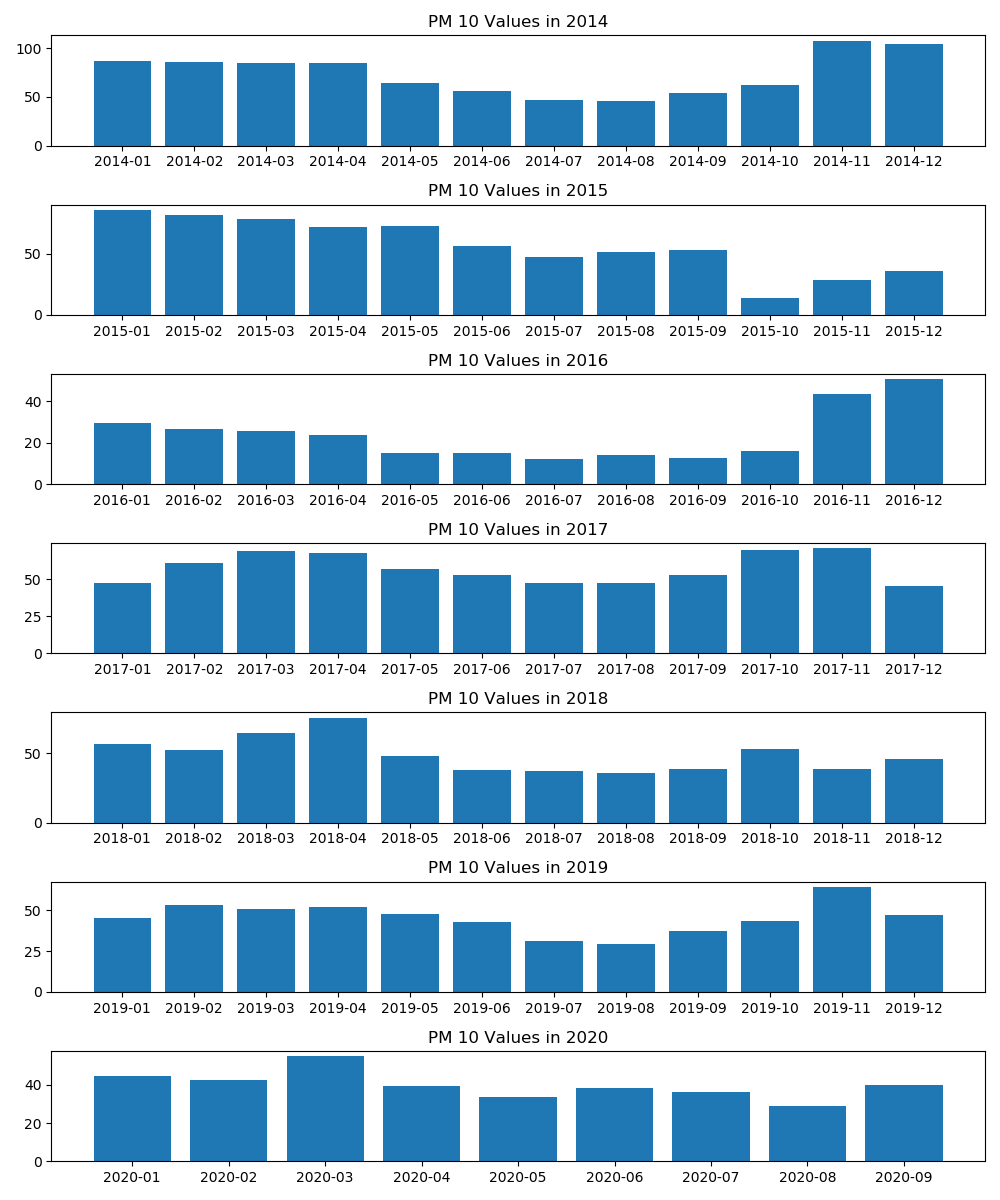

In [434]:
fig, axs = plt.subplots(len(month_grouped_combined_df.mean().Year.unique()), 1, figsize=(10,12))

for k, year in zip(range(len(month_grouped_combined_df.mean().Year.unique())),
                   range(int(month_grouped_combined_df.mean().Year.min()),
                         int(month_grouped_combined_df.mean().Year.max())+1)):
    year_mask = (month_grouped_combined_df.mean().Year == year)
    axs[k].bar(month_grouped_combined_df.mean()[year_mask].index, month_grouped_combined_df.mean()[year_mask].pm10)
    axs[k].set_title("PM 10 Values in " + str(year))
    
plt.tight_layout()

<IPython.core.display.Javascript object>


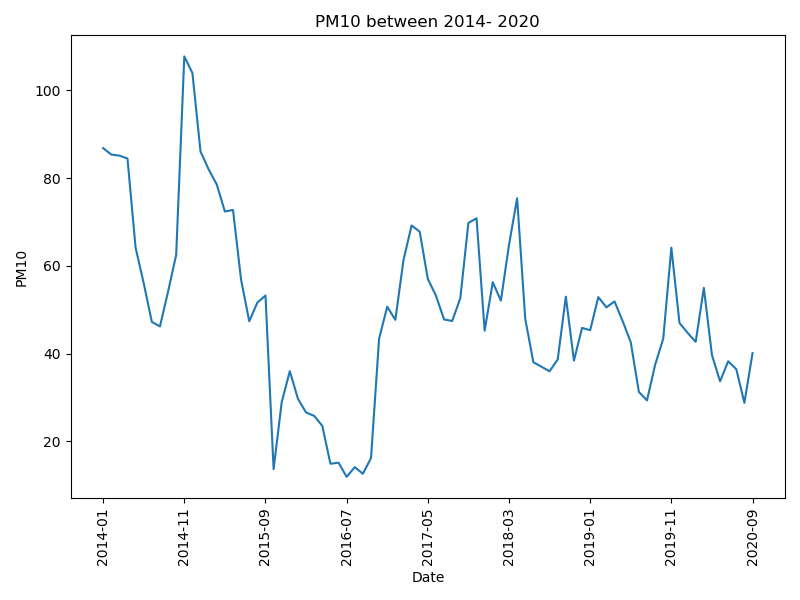

In [528]:
plt.figure(figsize=(8,6))
month_grouped_combined_df.mean().pm10.plot()
plt.xticks(rotation=90)
plt.ylabel("PM10")
plt.title("PM10 between 2014- 2020")
plt.tight_layout()

<IPython.core.display.Javascript object>


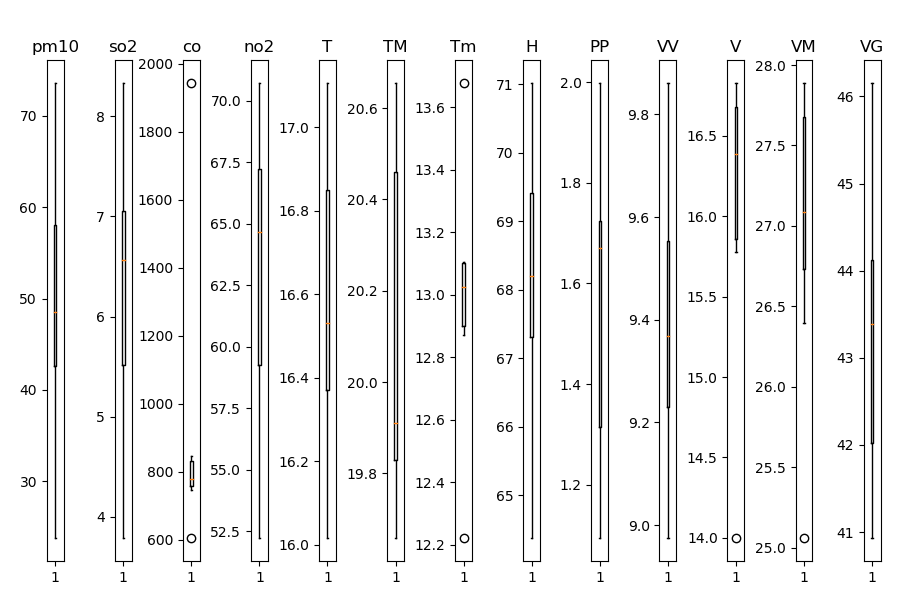

In [529]:
fig, axs = plt.subplots(1, len(year_grouped_combined_df.mean().columns)-1, figsize=(9, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(year_grouped_combined_df.mean().columns)-1),
                     year_grouped_combined_df.mean().columns[:-1]):
    axs[num].boxplot(year_grouped_combined_df.mean()[cols])
    axs[num].set_title(year_grouped_combined_df.mean()[cols].name)

#### Visualization of Dataset filtered by Years

<IPython.core.display.Javascript object>


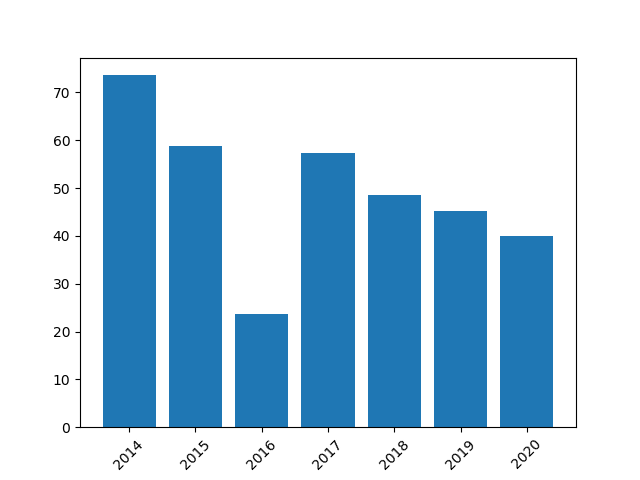

In [530]:
fig, ax = plt.subplots()
ax.bar(year_grouped_combined_df.mean().index, year_grouped_combined_df.mean().pm10)
plt.xticks(rotation=45);

<IPython.core.display.Javascript object>


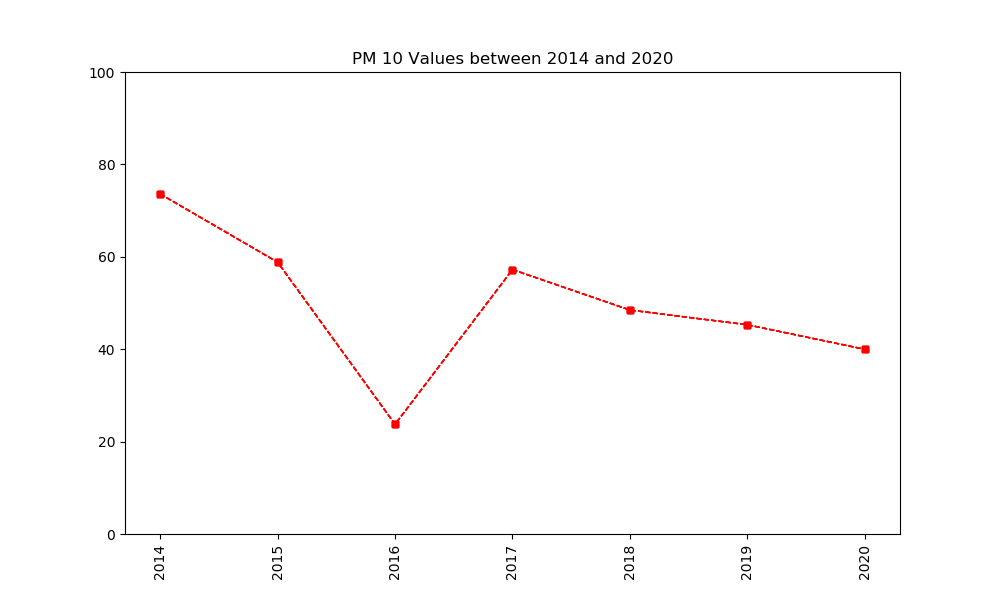

In [531]:
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(year_grouped_combined_df.mean().index.min()),int(year_grouped_combined_df.mean().index.max())+1):
    axs.plot(year_grouped_combined_df.mean().pm10, marker="s", ls="--", lw=1, alpha=0.7, color="r", markersize=4, label="Year")
    axs.set_title("PM 10 Values between 2014 and 2020")

plt.xticks(rotation=90)
plt.ylim([0, 100]);

Enter a year between 2014 - 2020
Start Year: 2014
End Year: 2020


<IPython.core.display.Javascript object>


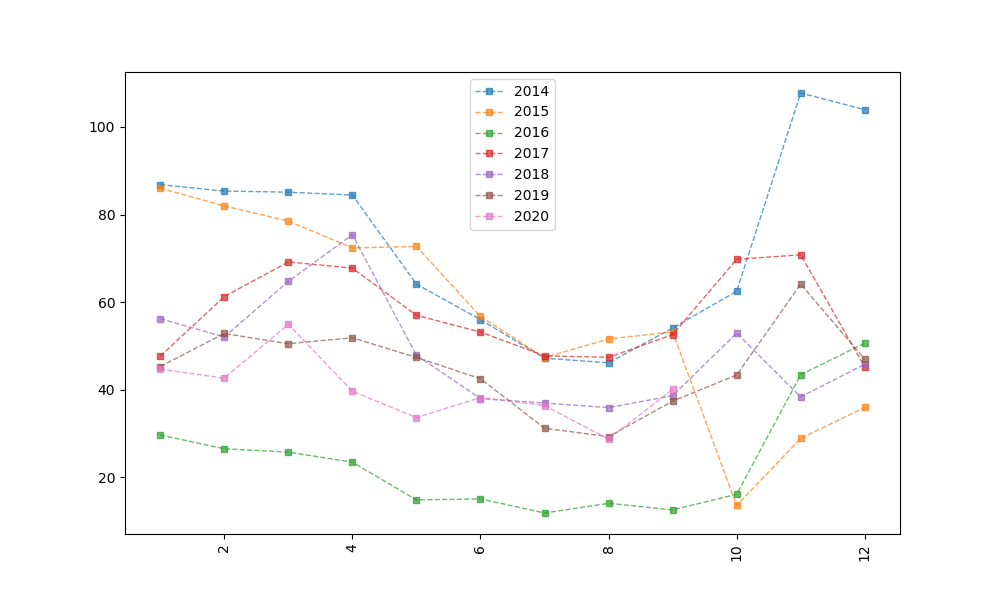

In [532]:
# Checking the all data based on selected years between 2014 - 2020
while True:

    print("Enter a year between 2014 - 2020")
    x = input("Start Year: ")
    y = input("End Year: ")
    
    if x >= "2014" and y <= "2020":
        break
        
    
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(x), int(y)+1):
    year_mask = (df_month.Year == year)

    axs.plot(month_grouped_combined_df.mean()[year_mask].set_index("Month").pm10,
             marker="s", ls="--", lw=1, alpha=0.7, markersize=4)
    #axs[k].set_title("PM 10 Values in " + str(year))
    plt.xticks(rotation=90)
    plt.legend([x for x in range(int(x), int(y)+1)])
#plt.tight_layout()

<IPython.core.display.Javascript object>


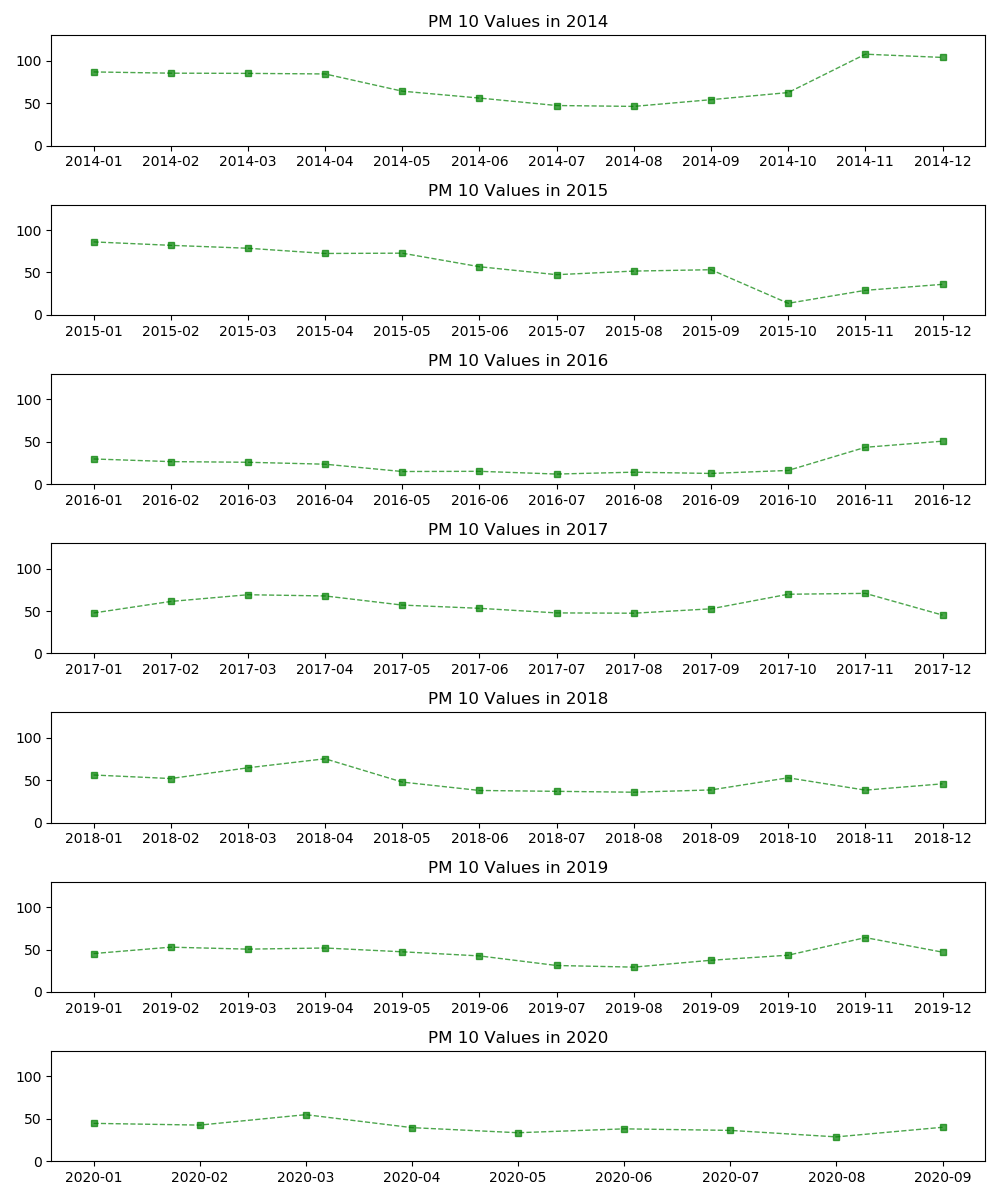

In [533]:
fig, axs = plt.subplots(len(df_month.Year.unique()), 1,figsize=(10, 12))

for num, year in zip(range(len(month_grouped_combined_df.mean().Year.unique())),
                     range(int(month_grouped_combined_df.mean().Year.min()), 
                           int(month_grouped_combined_df.mean().Year.max())+1)):

    year_mask = (month_grouped_combined_df.mean().Year == year)
    #axs[num].set_xticks(rotation=90)
    axs[num].set_ylim(0,130)

    axs[num].plot(month_grouped_combined_df.mean()[year_mask].pm10,
                  marker="s", ls="--", lw=1, alpha=0.7, markersize=4, color="green")
    axs[num].set_title("PM 10 Values in " + str(year))
plt.tight_layout()


#### Visualization of Full Dataset

In [55]:
combined_df.head()

,Date,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year
0,2014-01,18.0,27.0,2.0,7.0,7.700,9.0000,6.30000,84.000000,0.000000,7.10000,11.50000,18.3,01,2014
1,2014-01,27.0,31.0,3.0,9.0,8.800,11.0000,7.00000,73.000000,0.000000,9.80000,8.70000,16.5,01,2014
2,2014-01,31.0,30.0,2.0,8.0,9.000,11.0000,7.50000,83.000000,0.510000,8.40000,10.20000,14.8,01,2014
3,2014-01,27.0,30.0,2.0,10.0,9.075,12.1375,6.04375,77.533333,0.413125,7.25625,13.41875,22.8,01,2014
4,2014-01,46.0,34.0,3.0,8.0,9.075,12.1375,6.04375,77.533333,0.413125,7.25625,13.41875,22.8,01,2014


<IPython.core.display.Javascript object>


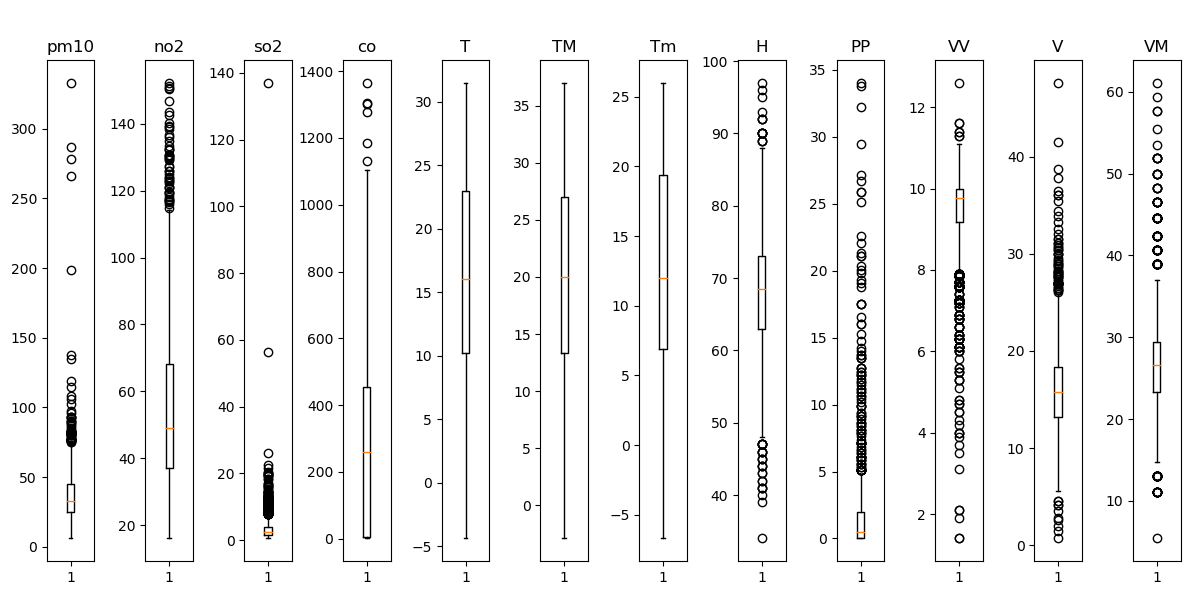

In [62]:
# The visualization of not filtered by Month/Year. 
fig, axs = plt.subplots(1, len(combined_df.columns[1:-2]), figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(combined_df.columns[1:-2])), combined_df.columns[1:-2]):
    
    axs[num].boxplot(combined_df[cols])
    axs[num].set_title(combined_df[cols].name)


In [536]:
combined_df.corr()

,pm10,so2,co,no2,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
pm10,1.000000,0.356762,0.182222,0.523463,-0.195394,-0.159960,-0.245435,0.152238,-0.099481,-0.372435,-0.382195,-0.284446,-0.183196,-0.124872,-0.244346
so2,0.356762,1.000000,0.477798,0.527107,-0.241092,-0.213882,-0.296515,0.000611,-0.096435,-0.191798,-0.297436,-0.201194,-0.127688,-0.188123,0.014328
co,0.182222,0.477798,1.000000,0.165742,-0.073760,-0.059934,-0.102772,0.079052,-0.057473,-0.132684,-0.131729,-0.080699,-0.073308,0.005031,0.265055
no2,0.523463,0.527107,0.165742,1.000000,-0.358016,-0.305155,-0.446373,0.060511,-0.046996,-0.299420,-0.521525,-0.398218,-0.303679,-0.209130,0.020674
T,-0.195394,-0.241092,-0.073760,-0.358016,1.000000,0.987622,0.978921,-0.435644,-0.191128,0.366189,-0.081806,-0.074862,-0.112741,0.358291,0.028540
TM,-0.159960,-0.213882,-0.059934,-0.305155,0.987622,1.000000,0.948397,-0.472109,-0.206721,0.344716,-0.114481,-0.091984,-0.131717,0.323252,0.036753
Tm,-0.245435,-0.296515,-0.102772,-0.446373,0.978921,0.948397,1.000000,-0.350853,-0.159263,0.376464,0.003224,-0.011718,-0.057304,0.367404,0.012318
H,0.152238,0.000611,0.079052,0.060511,-0.435644,-0.472109,-0.350853,1.000000,0.297060,-0.402265,0.076489,0.123057,0.079188,-0.060437,0.002887
PP,-0.099481,-0.096435,-0.057473,-0.046996,-0.191128,-0.206721,-0.159263,0.297060,1.000000,-0.095066,0.177477,0.221802,0.244113,-0.025860,-0.020752
VV,-0.372435,-0.191798,-0.132684,-0.299420,0.366189,0.344716,0.376464,-0.402265,-0.095066,1.000000,0.083514,0.066446,-0.028345,0.123849,0.173719


<IPython.core.display.Javascript object>


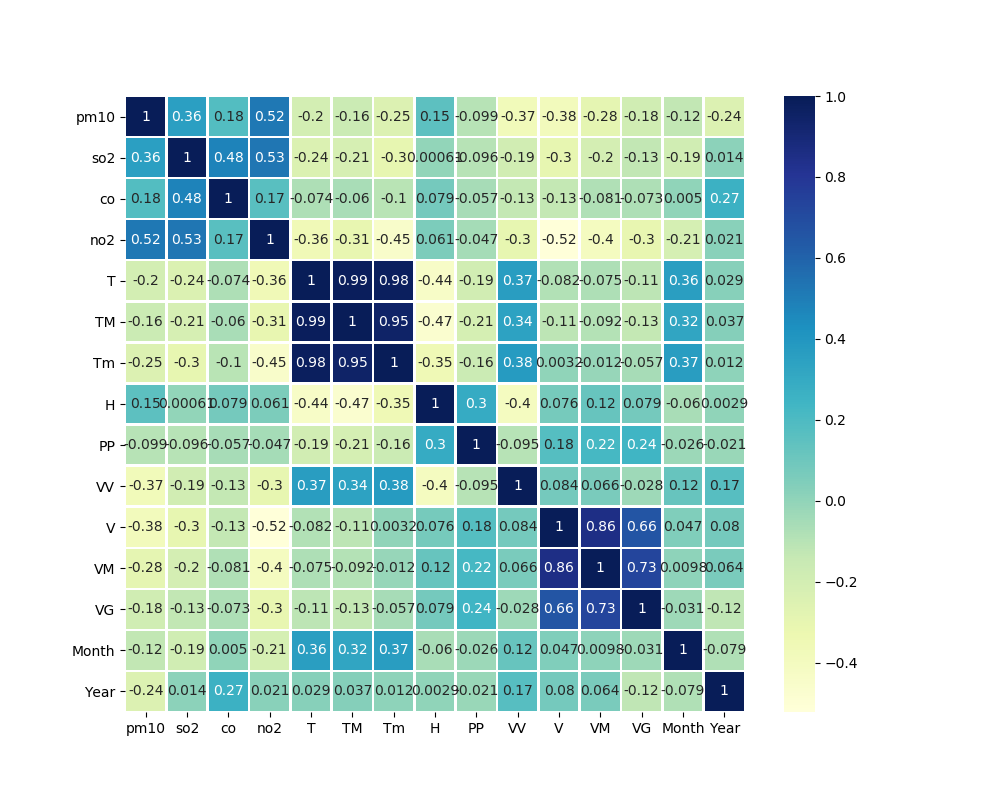

In [537]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(combined_df.corr(), annot=True, lw=1, cmap="YlGnBu")

# Feature Selection

### Before Feature Selection Methods have been applied (using all features)

In [59]:
X = combined_df.drop("pm10", axis=1)
y = combined_df.pm10

In [60]:
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import classification_report
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=101)
#
#rf_model = RandomForestRegressor().fit(X_train, y_train)
#predictions = rf_model.predict(X_test)


ValueError: could not convert string to float: '2016-12'

## Feature Selection w/ Univariate Method

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2


## Feature Selection w/ Correlation Matrix

In [ ]:
import seaborn as sns


In [ ]:
combined_df.corr()["pm10"].abs().nlargest(5)